# tutorial to generate checkerbord cell simulation with an artbitray expression

In [100]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
import skimage
from sklearn.utils.random import sample_without_replacement
import sys
from scipy.sparse import csr_array

In [104]:
sys.path += [
    '/snap/pycharm-professional/348/plugins/python/helpers/pydev',
    '/snap/pycharm-professional/348/plugins/python/helpers/third_party/thriftpy',
    '/snap/pycharm-professional/348/plugins/python/helpers/pydev', 
    '/snap/pycharm-professional/348/plugins/python/helpers/pycharm_display',
             '/home/tom/anaconda3/envs/simulation/lib/python38.zip',
             '/home/tom/anaconda3/envs/simulation/lib/python3.8',
             '/home/tom/anaconda3/envs/simulation/lib/python3.8/lib-dynload', 
             '/home/tom/.local/lib/python3.8/site-packages', 
             '/home/tom/anaconda3/envs/simulation/lib/python3.8/site-packages',
             '/snap/pycharm-professional/348/plugins/python/helpers/pycharm_matplotlib_backend', 
             '/home/tom/Bureau/phd/simulation/simulation_pkg/src'
            ]


import simtissue
from simtissue.arbitrary_shape import checkerboard_mask, generate_ellipse, add_sphere_nuclei

from simtissue.plot import plot_contour
from simtissue.control_expression import create_fix_profile, simulate_arbritrary_expression
from simtissue.utils import get_dict_coord_map

### generate checkerboard 

In [105]:

#### arbitrary.py









#### plot.py




##### control_expression.py

### utils.py




list index out of range
no contour for cell 110.0


(<Figure size 500x500 with 1 Axes>, <AxesSubplot:>)

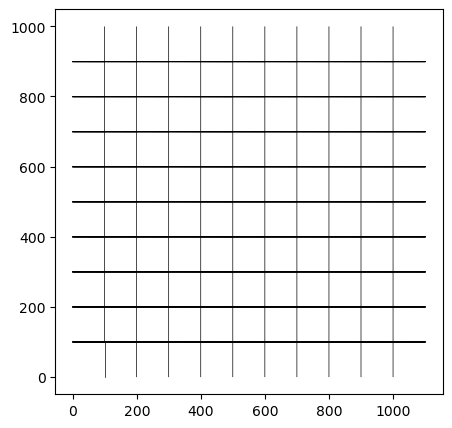

In [91]:
mask_cyto = checkerboard_mask(shape = [1, 1000, 1100],
                         cube_square_size = 100)
plot_contour(mask_cyto = mask_cyto, figsize = (5,5))

### add nuclei in the checcker board

list index out of range
no contour for cell 110.0
list index out of range
no contour for cell 110.0


(<Figure size 500x500 with 1 Axes>, <AxesSubplot:>)

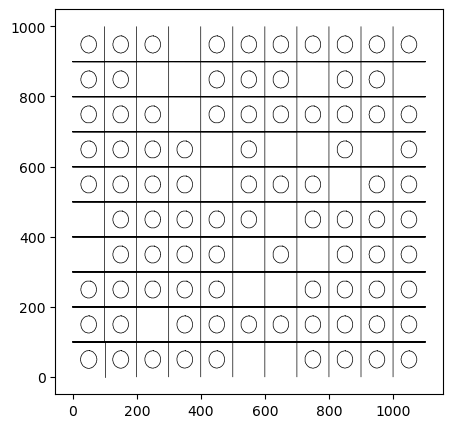

In [92]:

## leave 20% of the cells without cytoplasm
list_nuclei_unique = np.unique(mask_cyto)
index  = sample_without_replacement(len(list_nuclei_unique), int(0.80 * len(list_nuclei_unique)))
list_nuclei = list_nuclei_unique[index]
mask_nuclei = add_sphere_nuclei(mask_cyto = mask_cyto, 
                     cube_square_size  = 100,
                     nuclei_radius = 25,
                     list_nuclei = list_nuclei)

plot_contour(mask_cyto = mask_cyto, mask_nuclei = mask_nuclei, figsize = (5,5))


### simulation of arbitrary cell expression

-we fisrt simulate a cell-expression matrix containing the expression profile we want to map in the checkerboard

In [156]:
### simulate spots coordinate


def simulate_arbritrary_expression(dico_profile,
                  cell_type_distribution,
        genes_list_to_simulate = ['A', 'B'],
        image_name = "image0"
        ):

    dico_cell_type_label_rna, dico_cell_index = create_fix_profile(
        dico_profile=dico_profile,
        cell_type_distribution=cell_type_distribution
                )

    dict_coord_map = get_dict_coord_map(mask_cell=mask_cyto,
                                        )
    list_index_cell = list(dict_coord_map.keys())

    for cell in list_index_cell:
        dico_cell_index[cell]["ground_truth"] = {}
    list_list_gene = []
    list_list_coord = []
    for cell in list_index_cell:
        list_gene = []
        list_coord = []
        for gene in genes_list_to_simulate:
            gene_index = genes_list_to_simulate.index(gene)
            nb_rna = int(dico_cell_index[cell]["rnaseq"][gene_index])
            out_ind = dict_coord_map[cell]
            spots_postion = out_ind[sample_without_replacement(len(out_ind), min(nb_rna, len(out_ind)))]
            #dico_cell_index[cell]["ground_truth"][gene] = list(spots_postion)
            #dico_fish_channel[gene]["ground_truth"] += list(spots_postion)
            list_coord += list(spots_postion)
            list_gene += [gene] * len(spots_postion)
        list_list_gene.append(list_gene)
        list_list_coord.append(list_coord)
    ## gene expression vector

    list_expression_vector = []
    for cell_index in list_index_cell:
        list_expression_vector.append(dico_cell_index[cell_index]["rnaseq"])

    anndata = ad.AnnData(csr_matrix(list_expression_vector))
    anndata.var["features"] = genes_list_to_simulate
    anndata.var_names = genes_list_to_simulate
    anndata.obs["image_name"] = [image_name] * len(list_list_gene)
    anndata.obsm["genes"] = np.array(list_list_gene)
    anndata.obsm["coordinate"] = np.array(list_list_coord)
    #anndata.obs["cell_index"] = list_index_cell
    
    
    adata = AnnData(csr_matrix(list_expression_vector),
  #                  obs = {'image_name': [image_name] * len(list_list_gene),
   #                        "cell_index" : list_index_cell},
                    
                obsm={"genes": np.array(list_list_gene),
                      "coordinate" :  np.array(list_list_coord)} )
    
    
    
    return adata

In [157]:
### generate_anndata


cell_index_typeA = [i for i in range(1, 111) if i % 2 == 0]
cell_index_typeB = [i for i in range(1, 111) if i % 2 == 1]
dico_profile={'typeA': [50, 0],
                  'typeB': [0, 200]
             }
cell_type_distribution={'typeA': cell_index_typeA,
                        'typeB': cell_index_typeB,}

genes_list_to_simulate = ['A', 'B']
image_name = "image0"

anndata = simulate_arbritrary_expression(dico_profile,
                  cell_type_distribution,
        genes_list_to_simulate = ['A', 'B'],
        image_name = "image0"
        )
anndata

/tmp/ipykernel_11734/3650972719.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  anndata.obsm["genes"] = np.array(list_list_gene)
/tmp/ipykernel_11734/3650972719.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  anndata.obsm["coordinate"] = np.array(list_list_coord)
/tmp/ipykernel_11734/3650972719.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when

AnnData object with n_obs × n_vars = 110 × 2
    obsm: 'genes', 'coordinate'

In [158]:
anndata.write('ff')

TypeError: Can't implicitly convert non-string objects to strings

Above error raised while writing key 'genes' of <class 'h5py._hl.group.Group'> to /

In [195]:
    dico_cell_type_label_rna, dico_cell_index = create_fix_profile(
        dico_profile=dico_profile,
        cell_type_distribution=cell_type_distribution
                )

    dict_coord_map = get_dict_coord_map(mask_cell=mask_cyto,
                                        )
    list_index_cell = list(dict_coord_map.keys())

    for cell in list_index_cell:
        dico_cell_index[cell]["ground_truth"] = {}
    list_list_gene = []
    list_list_coord = []
    for cell in list_index_cell:
        list_gene = []
        list_coord = []
        for gene in genes_list_to_simulate:
            gene_index = genes_list_to_simulate.index(gene)
            nb_rna = int(dico_cell_index[cell]["rnaseq"][gene_index])
            out_ind = dict_coord_map[cell]
            spots_postion = out_ind[sample_without_replacement(len(out_ind), min(nb_rna, len(out_ind)))]
            #dico_cell_index[cell]["ground_truth"][gene] = list(spots_postion)
            #dico_fish_channel[gene]["ground_truth"] += list(spots_postion)
            list_coord += list(spots_postion)
            list_gene += [gene] * len(spots_postion)
        list_list_gene.append(list_gene)
        list_list_coord.append(np.array(list_gene))
    ## gene expression vector

    list_expression_vector = []
    for cell_index in list_index_cell:
        list_expression_vector.append(dico_cell_index[cell_index]["rnaseq"])

    anndata = ad.AnnData(csr_matrix(list_expression_vector))
    anndata.var["features"] = genes_list_to_simulate
    anndata.var_names = genes_list_to_simulate
    anndata.obs["image_name"] = [image_name] * len(list_list_gene)
    anndata.obs["genes"] = np.array(list_list_gene, dtype=object)
    anndata.obs["coordinate"] = np.array(list_list_coord, dtype=object)
    #anndata.obs["cell_index"] = list_index_cell
    
    

In [198]:
anndata

for col in  anndata.obs.columns:
    print(col)
    anndata.obs[col] = anndata.obs[col].astype(str)

image_name
genes
coordinate


In [199]:
anndata.write_h5ad('r')

In [186]:
scanpy

#### plot of final simulation

list index out of range
no contour for cell 110.0
list index out of range
no contour for cell 110.0


(<Figure size 1500x1500 with 1 Axes>, <AxesSubplot:>)

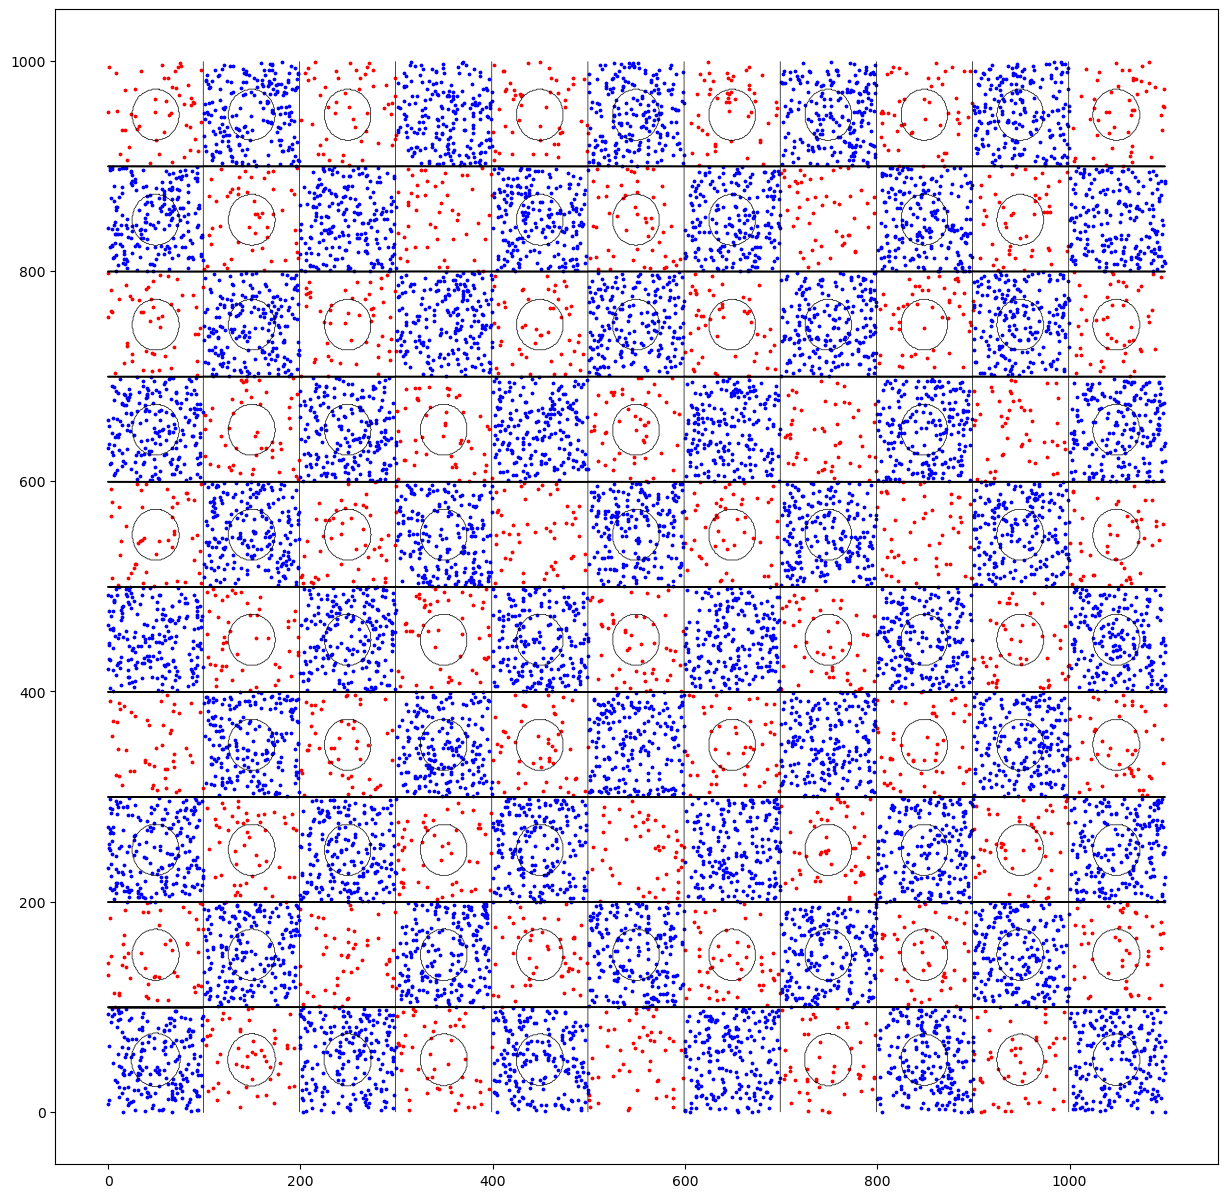

In [98]:
plot_contour(mask_cyto = mask_cyto,
                 mask_nuclei = mask_nuclei,
                 figsize = (15,15),
                anndata = anndata,
                dico_color = {"A" : "r", "B": "b"},
                spot_size = 3)

In [144]:
from numpy.random import default_rng

import matplotlib.pyplot as plt

import scanpy as sc
#import squidpy as sq
from anndata import AnnData


rng = default_rng(42)
counts = rng.integers(0, 15, size=(10, 100))  # feature matrix
coordinates = rng.uniform(0, 10, size=(10, 2, 2))  # spatial coordinates
image = rng.uniform(0, 1, size=(10, 10, 3))  # image
adata = AnnData(counts, obs = {'t': ['r'] * 10},
                obsm={"spatial": coordinates, "name" : np.array(['r'] * 10)} )
adata.write('ff')

In [151]:
adata.obsm["spatial"]

array([[[7.36705688, 8.86402887],
        [9.21057197, 5.03632925]],

       [[5.20275115, 7.99870411],
        [3.14450692, 8.37382362]],

       [[4.94141647, 1.15856724],
        [0.72059147, 8.41993211]],

       [[0.55567917, 2.80611436],
        [3.34130041, 1.72994445]],

       [[3.1389337 , 7.42692567],
        [0.14682844, 8.27173425]],

       [[8.56548024, 3.72261573],
        [1.53612899, 6.00840408]],

       [[1.19672556, 3.64919361],
        [9.58429181, 9.95464473]],

       [[7.72104891, 3.1096151 ],
        [6.87665049, 7.05406365]],

       [[3.87841695, 6.40888635],
        [0.10727645, 2.09057659]],

       [[5.25088303, 1.63751304],
        [1.65906868, 8.36304291]]])